# HW07 <font color=red>(제출기한-6월7일자정)</font>
Datascience 모듈의 Table 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤, 코드 셀에 적절한 코드를 작성합니다.
- 작성 후 파일명에 ``학번``을 자신의 학번으로 고친 후 ULMS 해당과제 제출란에 업로드합니다.

In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [1]:
scores = Table.read_table('https://raw.githubusercontent.com/MaEulHP/weather/master/Weather.csv')
scores

NameError: ignored

### 문제1
Section별 median을 구하여 ``section_median`` Table 변수에  저장하시오.

In [0]:
### 답안을 작성하시오.
section_median = scores.select('Section','Midterm').group('Section',np.median)

In [0]:
### 지우지 마시오.
section_median

Section,Midterm median
1,15
2,16.5
3,15
4,14
5,18
6,16
7,17
8,17
9,16
10,16


### 문제2
4번 Section의 학생수를 ``no_student``변수에 저장하시오. 

In [0]:
### 답안을 작성하시오.
no_student = scores.where('Section',4).group('Section')[1][0]

In [0]:
### 지우지 마시오.
no_student

30

### 문제3
전체 학생중 4번 Section 학생 수 만큼 랜덤하게 sampling 후 Midterm 점수의 median을 계산하는 시행을 10000번 반복하고 그 분포를 이후에 알아보고자 한다. 이를 위해 table이름, table내  label이름, sample의 수, repetition횟수를 인자로 받아 시뮬레이션을 하여 얻은 median들의 결과 array를 리턴하는 함수 ``sample_median``를 작성하시오. (permuted_sample_average_difference 함수 내용을 참고할 것)

(단, ``replacement``는 False로 설정한다.)

In [0]:
def sample_median(table, label, no_sample, repetitions):
### 답안을 작성하시오.
  md = make_array()
  for i in np.arange(repetitions):
    A = np.median(np.random.choice(table[label], no_sample))
    md = np.append(md, A)
  return md

In [0]:
### 지우지 마시오.
results = sample_median(scores, 'Midterm', no_student, 10000)
results

array([14.5, 14.5, 16.5, ..., 17. , 16. , 18. ])

### 문제4
위 ``results`` 배열에 대해 historgram을 그려보시오. 

또한, 관측값을 Ch12의 예제처럼 붉은색 원으로 표시하시오.

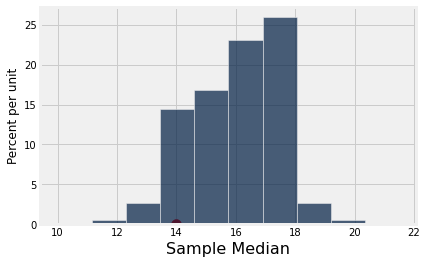

In [0]:
### 답안을 작성하시오.
Table().with_column('Sample Median', results).hist()
plots.scatter(section_median[1][3], 0, color='red', s=100)

### 문제5
위에서 구한 ``results``에 대하여 관측값(4번 Section의 median)의 ``p-value``를 계산하시오. 

In [0]:
### 답안을 작성하시오.
np.count_nonzero(results <= scores[1][3])/10000

0.1393

### 문제6
``scores`` Table에서 Section이 4 또는 5인 경우만을 선택하여 ``scores_two`` Table 변수에 저장하시오.  

In [0]:
### 답안을 작성하시오.
scores_two = scores.where('Section', are.between_or_equal_to(4, 5))

In [0]:
### 지우지 마시오.
scores_two

Section,Midterm
4,19
5,8
5,24
5,24
5,16
5,21
5,24
4,14
5,23
4,24


### 문제7
5번 Section의 median에서 4번 Section의 median을 뺀 값을 ``observed``변수에 저장하시오. 

In [0]:
### 답안을 작성하시오.
observed = scores.where('Section',5).group('Section',np.median)[1][0] - scores.where('Section',4).group('Section',np.median)[1][0]

In [0]:
### 지우지 마시오.
observed

4.0

### 문제8
위 ``scores_two`` Table에 대하여 shuffling 한 후 두 그룹 (5번과 4번 Section) 사이의 median 차이를 구하는 시행을 10000번 반복하여 그 결과를 array에 저장하려고 한다. 이를 위해 Ch12 에서 배운 ``permuted_sample_average_difference``을 적절하게 변경하여 ``permuted_sample_median_difference``를 작성하시오. 


In [0]:
def permuted_sample_median_difference(table, label, group_label, repetitions):
### 답안을 작성하시오.
  tbl = table.select(group_label, label)
    
  differences = make_array()
  for i in np.arange(repetitions):
    shuffled = tbl.sample(with_replacement = False).column(1)
    original_and_shuffled = tbl.with_column('Shuffled Data', shuffled)

    shuffled_median = original_and_shuffled.group(group_label, np.median).column(2)
    simulated_difference = shuffled_median.item(1) - shuffled_median.item(0)
    
    differences = np.append(differences, simulated_difference)
    
  return differences   
  

In [0]:
### 지우지 마시오.
shuffle_results = permuted_sample_median_difference(scores_two, 'Midterm', 'Section', 10000)
shuffle_results

array([-0.5, -1.5,  3.5, ..., -2. ,  5. , -2. ])

### 문제9
위 ``shuffled_results`` 배열에 대해 historgram을 그려보시오. 


또한, 관측값을 Ch12의 예제처럼 붉은색 원으로 표시하시오.

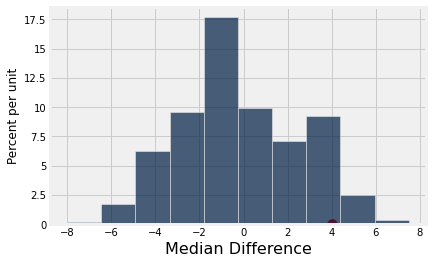

In [0]:
### 답안을 작성하시오.
Table().with_column('Median Difference', shuffle_results).hist()
plots.scatter(observed, 0, color='red', s=100)

### 문제10
위에서 구한 ``shuffle_results``에 대하여 관측값(``observed``변수값)의 ``p-value``를 계산하시오. 

In [0]:
### 답안을 작성하시오.
np.count_nonzero(shuffle_results <= observed)/10000

0.9559